<a href="https://colab.research.google.com/github/Yueming02/Datathon/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np 
import pandas as pd

In [110]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Embedding, LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#import gensim

In [111]:
df_true=pd.read_csv('drive/MyDrive/DataSet_Misinfo_TRUE.csv')

In [112]:
df_fake=pd.read_csv('drive/MyDrive/DataSet_Misinfo_FAKE.csv')

In [113]:
df_true['label']=1
df_true=df_true.drop('Unnamed: 0',axis=1)
df_true.head()

,text,label
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1


In [114]:
df_fake['label']=0
df_fake=df_fake.drop('Unnamed: 0',axis=1)
df_fake.head()
df_fake.shape

(43642, 2)

In [115]:
df_true.shape

(34975, 2)

In [116]:
df=pd.concat([df_true,df_fake])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78617 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78588 non-null  object
 1   label   78617 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [117]:
df=df.dropna(how="any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78588 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78588 non-null  object
 1   label   78588 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [118]:
df.shape

(78588, 2)

Do some text cleaning

In [119]:
# Function to clean text
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]|_', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = text.split()
    # Remove stop words
    # (You will need to download the NLTK library and the stopwords corpus for this)
    # from nltk.corpus import stopwords
    # stop_words = set(stopwords.words('english'))
    # words = [w for w in words if not w in stop_words]
    # Stemming or Lemmatization
    # (You will need to download the NLTK library and the WordNetLemmatizer for this)
    # from nltk.stem import WordNetLemmatizer
    # lemmatizer = WordNetLemmatizer()
    # words = [lemmatizer.lemmatize(w) for w in words]
    # Join the words back into a string
    clean_text = ' '.join(words)
    return clean_text

# Apply the clean_text function to the 'text' column
df['clean_text'] = df['text'].apply(clean_text)

# View the results
print(df.head)



<bound method NDFrame.head of                                                     text  label  \
0      The head of a conservative Republican faction ...      1   
1      Transgender people will be allowed for the fir...      1   
2      The special counsel investigation of links bet...      1   
3      Trump campaign adviser George Papadopoulos tol...      1   
4      President Donald Trump called on the U.S. Post...      1   
...                                                  ...    ...   
43637  The USA wants to divide Syria.\r\n\r\nGreat Br...      0   
43638  The Ukrainian coup d'etat cost the US nothing ...      0   
43639  The European Parliament falsifies history by d...      0   
43640  The European Parliament falsifies history by d...      0   
43641  A leading FSB officer, Segey Beseda, said duri...      0   

                                              clean_text  
0      the head of a conservative republican faction ...  
1      transgender people will be allowed for t

In [120]:
df.shape

(78588, 3)

In [39]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Define stop words
stop_words = set(STOPWORDS)

# Define function to preprocess text
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

# Preprocess text data
processed_data = []
for doc in df['clean_text']:
    processed_data.append(preprocess(doc))

# Create dictionary
dictionary = corpora.Dictionary(processed_data)

# Convert corpus to bag of words format
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.012*"police" + 0.011*"said" + 0.007*"state" + 0.006*"court" + 0.006*"case" + 0.006*"department" + 0.005*"federal" + 0.005*"justice" + 0.005*"government" + 0.004*"rights"
Topic: 1 
Words: 0.029*"trump" + 0.020*"clinton" + 0.014*"hillary" + 0.010*"president" + 0.010*"election" + 0.008*"donald" + 0.008*"campaign" + 0.007*"obama" + 0.007*"said" + 0.005*"presidential"
Topic: 2 
Words: 0.009*"people" + 0.007*"like" + 0.005*"time" + 0.004*"world" + 0.003*"know" + 0.003*"black" + 0.003*"said" + 0.003*"dont" + 0.003*"years" + 0.003*"life"
Topic: 3 
Words: 0.013*"russia" + 0.008*"russian" + 0.008*"military" + 0.007*"ukraine" + 0.007*"syria" + 0.005*"said" + 0.005*"government" + 0.005*"united" + 0.005*"states" + 0.004*"state"
Topic: 4 
Words: 0.005*"money" + 0.005*"government" + 0.005*"health" + 0.005*"percent" + 0.004*"million" + 0.004*"states" + 0.004*"year" + 0.004*"economic" + 0.003*"said" + 0.003*"years"


In [ ]:
# Get the topic distributions for each document in the dataset
doc_topic_dists = np.array([lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus])

# Print the topic distributions for the first 5 documents
for i in range(5):
    print(f"Document {i}: {doc_topic_dists[i]}")


In [ ]:
# Print the topic distributions for the first 5 documents
for i in range(10):
    print(f"Document {i}: {doc_topic_dists[i]}")

In [122]:
#doc_topic_dists.shape
doc_topic_dists.shape

(78588, 5, 2)

In [123]:
doc_topic = doc_topic_dists

In [124]:
df_topic = pd.DataFrame(doc_topic.reshape(-1, 2), columns=['topic', 'probability'])

# repeat index 1,2,3,4,5 78588 times
df_topic.index = np.concatenate([np.repeat([i], 5) for i in range(78588)])
#index = np.repeat(np.arange(5), data.shape[0])

# preview the resulting dataframe
print(df_topic.head(15))


   topic  probability
0    0.0     0.049613
0    1.0     0.431341
0    2.0     0.000548
0    3.0     0.000544
0    4.0     0.517954
1    0.0     0.640212
1    1.0     0.186991
1    2.0     0.000997
1    3.0     0.107258
1    4.0     0.064541
2    0.0     0.053317
2    1.0     0.887377
2    2.0     0.000920
2    3.0     0.057475
2    4.0     0.000912


In [126]:
df = df.reset_index()
df1 = pd.concat([df, df_topic], axis=1)

In [140]:
print(df1.head(-20))

       index                                               text  label  \
0          0  The head of a conservative Republican faction ...      1   
0          0  The head of a conservative Republican faction ...      1   
0          0  The head of a conservative Republican faction ...      1   
0          0  The head of a conservative Republican faction ...      1   
0          0  The head of a conservative Republican faction ...      1   
...      ...                                                ...    ...   
78583  43637  The USA wants to divide Syria.\r\n\r\nGreat Br...      0   
78583  43637  The USA wants to divide Syria.\r\n\r\nGreat Br...      0   
78583  43637  The USA wants to divide Syria.\r\n\r\nGreat Br...      0   
78583  43637  The USA wants to divide Syria.\r\n\r\nGreat Br...      0   
78583  43637  The USA wants to divide Syria.\r\n\r\nGreat Br...      0   

                                              clean_text  topic  probability  
0      the head of a conservativ

In [147]:
data = {'topic':[0,1,2,3,4],
        "Type":['Police and Law','Domestic Politics','Daily','International Politics','Society'],
        "Keywords":['police，state,court','trump, clinton, president, election','people, like, world'
        , 'russia,military,ukraine,syria', 'money, government, health, economics']}
df_topicslabel = pd.DataFrame(data)

print(df_topicslabel.head())

   topic                    Type                              Keywords
0      0          Police and Law                    police，state,court
1      1       Domestic Politics   trump, clinton, president, election
2      2                   Daily                   people, like, world
3      3  International Politics         russia,military,ukraine,syria
4      4                 Society  money, government, health, economics


In [157]:
df_final = df1.join(df_topicslabel, on = 'topic', lsuffix="_left")
df_final = df_final.drop(['text','clean_text', 'topic_left'], axis=1)
print(df_final.head(10))

   index  label  probability  topic                    Type  \
0      0      1     0.049613      0          Police and Law   
0      0      1     0.431341      1       Domestic Politics   
0      0      1     0.000548      2                   Daily   
0      0      1     0.000544      3  International Politics   
0      0      1     0.517954      4                 Society   
1      1      1     0.640212      0          Police and Law   
1      1      1     0.186991      1       Domestic Politics   
1      1      1     0.000997      2                   Daily   
1      1      1     0.107258      3  International Politics   
1      1      1     0.064541      4                 Society   

                               Keywords  
0                    police，state,court  
0   trump, clinton, president, election  
0                   people, like, world  
0         russia,military,ukraine,syria  
0  money, government, health, economics  
1                    police，state,court  
1   trump, c

In [158]:
df_final.to_csv('drive/MyDrive/DataProcessed.csv')

Remove stop words & Tokenization

In [11]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:

y = df["label"].values

X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df["clean_text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)


In [14]:
print(X[:10])

[['head', 'conservative', 'republican', 'faction', 'us', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'pay', 'tax', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'cbs', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'big', 'budget', 'increase', 'military', 'spending', 'democrats', 'also', 'want', 'proportional', 'increases', 'nondefense', 'discretionary', 'spending', 'programs', 'support', 'education', 'scient

Stemming or Lemmatization (better use Lemmatization?)

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()
lemmatized_X = []
for paragraph in X:
    lemmatized_paragraph = [lemmatizer.lemmatize(word) for word in paragraph]
    lemmatized_X.append(lemmatized_paragraph)

In [18]:
print(lemmatized_X[:10])
type(lemmatized_X)

[['head', 'conservative', 'republican', 'faction', 'u', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'pay', 'tax', 'cut', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'way', 'among', 'republican', 'u', 'representative', 'mark', 'meadow', 'speaking', 'cbs', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmaker', 'bracing', 'battle', 'january', 'return', 'holiday', 'wednesday', 'lawmaker', 'begin', 'trying', 'pas', 'federal', 'budget', 'fight', 'likely', 'linked', 'issue', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaign', 'approach', 'republican', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republican', 'want', 'big', 'budget', 'increase', 'military', 'spending', 'democrat', 'also', 'want', 'proportional', 'increase', 'nondefense', 'discretionary', 'spending', 'program', 'support', 'education', 'scientific', 'research

list

Vectorization and Test the performance a bit

In [19]:
#testing performance a bit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split

# Convert the preprocessed data to strings for input to the vectorizer
X_strLemm = [' '.join(paragraph) for paragraph in lemmatized_X]

# Vectorize the text data using the TF-IDF method
vectorizer = TfidfVectorizer()
X_vecLemm = vectorizer.fit_transform(X_strLemm)


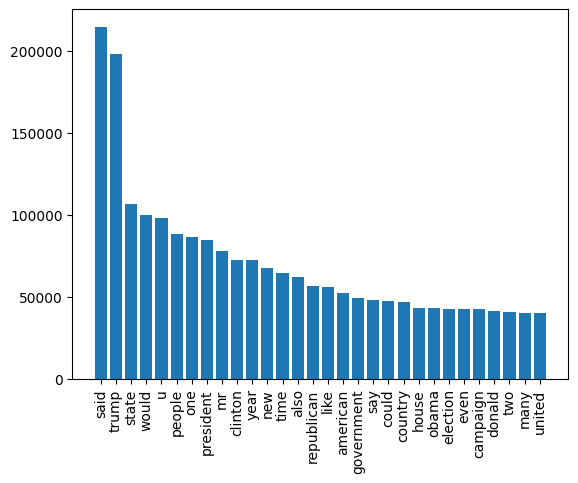

In [27]:
from collections import Counter

# Concatenate all the text into one string
all_text = ' '.join(X_strLemm)

# Split the text into individual words
words = all_text.split()

# Count the frequency of each word using Counter
word_counts = Counter(words)

# Get the most common words
top_words = word_counts.most_common(30)

# Create a bar chart of the top words
labels, values = zip(*top_words)
indexes = range(len(labels))
plt.bar(indexes, values)
plt.xticks(indexes, labels, rotation='vertical')
plt.show()


In [28]:
import nltk
from nltk.util import ngrams

# Tokenize the text and generate a list of unigrams, bigrams, and trigrams
tokens = nltk.word_tokenize(all_text)
unigrams = ngrams(tokens, 1)
bigrams = ngrams(tokens, 2)
trigrams = ngrams(tokens, 3)

# Print the top 10 most common bigrams
freq_dist = nltk.FreqDist(bigrams)
print(freq_dist.most_common(10))

[(('donald', 'trump'), 38213), (('united', 'state'), 32163), (('white', 'house'), 22007), (('hillary', 'clinton'), 21779), (('mr', 'trump'), 18946), (('new', 'york'), 18058), (('last', 'year'), 9046), (('president', 'donald'), 7899), (('last', 'week'), 7512), (('north', 'korea'), 7007)]


In [ ]:
# Split the vectorized data into training and testing sets Stemm
X_trainLemm, X_testLemm, y_trainLemm, y_testLemm = train_test_split(X_vecLemm, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the vectorized training data
lrLem = LogisticRegression()
lrLem.fit(X_trainLemm, y_trainLemm)

# Predict the labels for the vectorized test data
y_predLemm = lrLem.predict(X_testLemm)

# Evaluate the accuracy of the predicted labels
accuracyLemm = accuracy_score(y_testLemm, y_predLemm)
print("AccuracyLemm:", accuracyLemm)

In [ ]:
print(classification_report(y_testLemm, y_predLemm))

Visualization

<Axes: >

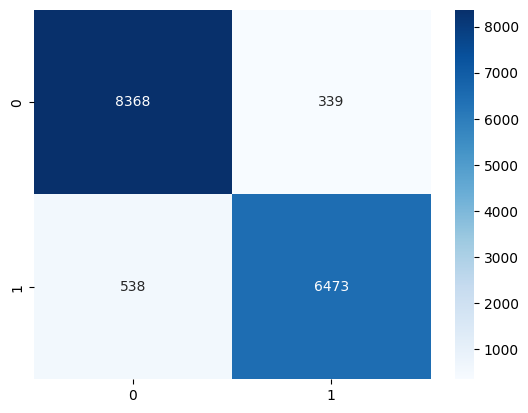

In [22]:
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
cm = confusion_matrix(y_testLemm, y_predLemm)

# display confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')


<Axes: >

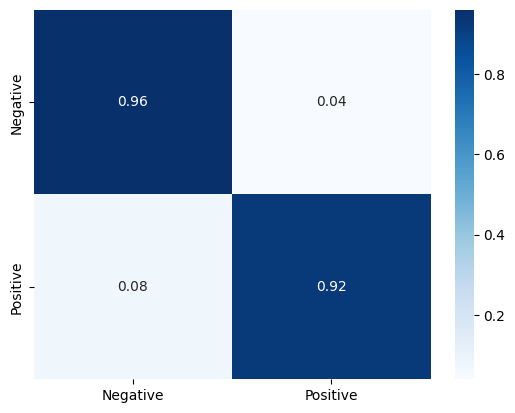

In [23]:


# Create a confusion matrix using sklearn
conf_mat = confusion_matrix(y_testLemm, y_predLemm)

# Normalize the confusion matrix
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Create a heatmap using seaborn
sns.heatmap(conf_mat_norm, cmap='Blues', annot=True, fmt='.2f', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the lemmatized list into a string
#text = ' '.join(X_strLemm)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(X_strLemm)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()



In [ ]:
df['cluster'] = cluster_labels

In [ ]:
print(df.head())


                                                text  label  cluster
0  The head of a conservative Republican faction ...      1        0
1  Transgender people will be allowed for the fir...      1        0
2  The special counsel investigation of links bet...      1        4
3  Trump campaign adviser George Papadopoulos tol...      1        4
4  President Donald Trump called on the U.S. Post...      1        1
